## Interference patterns from glass slide
Assumption: doubly reflected ray is close enough to original so that both end up on same position

![Interference](img/interference.svg)

### Fresnel equations:

$$ R_s = \left| \frac{
   n_{1} \cos \theta-n_{2} \sqrt{1-\left(\frac{n_{1}}{n_{2}} \sin \theta\right)^{2}}
}{
   n_{1} \cos \theta+n_{2} \sqrt{1-\left(\frac{n_{1}}{n_{2}} \sin \theta\right)^{2}}
}\right|^2 $$

$$ R_p = \left| \frac{
   n_{1} \sqrt{1-\left(\frac{n_{1}}{n_{2}} \sin \theta\right)^{2}}-n_{2} \cos \theta
}{
   n_{1} \sqrt{1-\left(\frac{n_{1}}{n_{2}} \sin \theta\right)^{2}}+n_{2} \cos \theta
} \right|^2 $$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def intensity_and_plot(theta, k, d, I1, I2, samples_per_pix, pix_per_deg, theta_deg, theta_max_deg, wavelength, xlim):
    
    # Compute intensity
    interf = np.cos(2*k*d / np.cos(theta));
    I = I1 + I2 + 2*np.sqrt(I1*I2) * interf

    # Subsampling for pixels
    Ipix = np.mean(I.reshape(-1, samples_per_pix), 1);
    theta_pix = theta_deg[int(samples_per_pix/2)::samples_per_pix]

    # Plot pix
    plt.figure(figsize=(17,5), dpi=90)
    plt.plot(theta_deg, I)
    plt.xlabel('$\\theta$ ($\degree$)')
    plt.ylabel('Intensity')
    plt.ylim(ymin=0)
    plt.xlim(xlim)
    plt.title(f'Fringes\nSlide thickness $d={d*1e3}$mm, wavelength $\lambda={wavelength*1e9}$nm')
    plt.show()

    # Plot pix
    plt.figure(figsize=(17,5), dpi=90)
    plt.plot(theta_pix, Ipix, '.-')
    plt.xlabel('$\\theta$ ($\degree$)')
    plt.xlim(xlim)
    plt.ylabel('Intensity')
    plt.ylim(ymin=0)
    plt.title(f'Fringes pixel values\n1pix = ${1/pix_per_deg}\degree$ = {samples_per_pix} samples')
    plt.show()

In [8]:
# Define the Fresnel equations
def fresnel_Rs(theta, n1, n2):
    """Compute reflectance for s-polarized light with Fresnel equations."""
    n1cos  = n1*np.cos(theta)
    n2sqrt = n2*np.sqrt(1 - (n1/n2 * np.sin(theta))**2)
    return np.abs((n1cos-n2sqrt) / (n1cos+n2sqrt))**2

def fresnel_Rp(theta, n1, n2):
    """Compute reflectance for p-polarized light with Fresnel equations."""
    n1sqrt = n2*np.sqrt(1 - (n1/n2 * np.sin(theta))**2)
    n2cos  = n1*np.cos(theta)
    return np.abs((n1sqrt-n2cos) / (n1sqrt+n2cos))**2

In [9]:
# Parameters
wavelength = 630e-9         # Wavelength in m
d = 0.5e-3                  # Slide thickness in m
I0 = 1                      # Base intensity

theta_max_deg = 45          # Maximum angle theta in deg
samples_per_pix = 50        # Samples per pixel
pix_per_deg = 10            # Num. of pixels per deg

k = (2*np.pi) / wavelength
N_tot = samples_per_pix * pix_per_deg * 2*theta_max_deg

# Range of angles in rad
theta_deg = np.linspace(-theta_max_deg, theta_max_deg, N_tot);
theta = theta_deg * np.pi/180;


# Compute Intensities from Fresnel equations
n1 = 1
n2 = 1.5

Rs = fresnel_Rs(theta, n1, n2)
Ts = 1 - Rs
I1s = Ts * I0
I2s = (Rs**2) * Ts * I0

Rp = fresnel_Rp(theta, n1, n2)
Tp = 1 - Rp
I1p = Tp * I0
I2p = (Rp**2) * Tp * I0

I1unp = (I1s + I1p)/2
I2unp = (I2s + I2p)/2


Intensity from Fresnel (unpolarized):


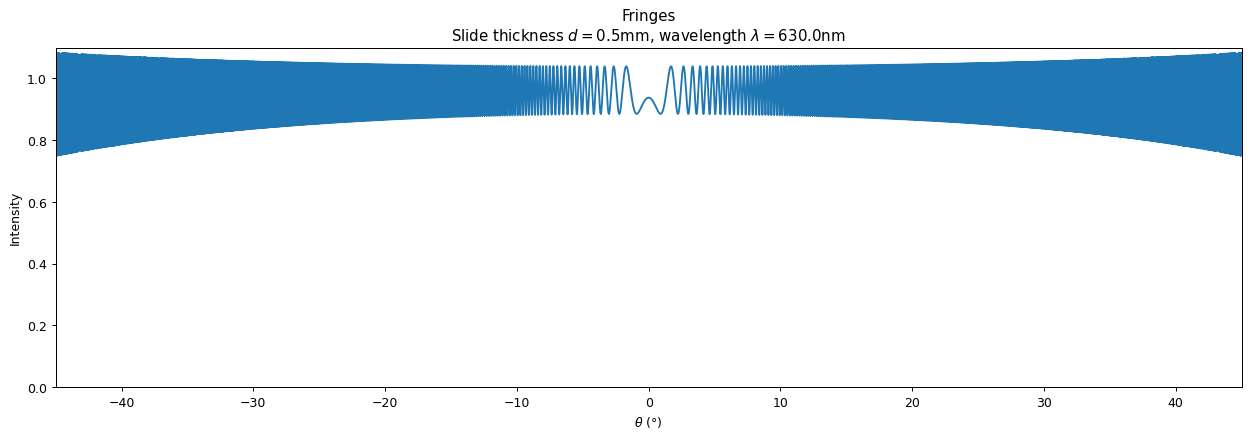

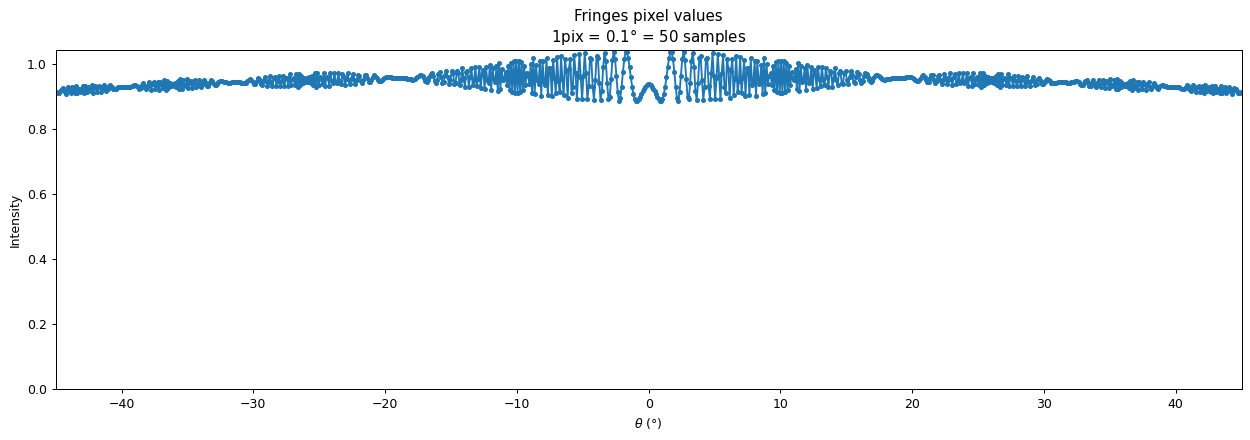


Field fraction E2/(E1+E2):
Max	= 0.084
Mean	= 0.051
Median	= 0.047


In [10]:
print('\nIntensity from Fresnel (unpolarized):')
intensity_and_plot(theta, k, d, I1unp, I2unp, samples_per_pix, pix_per_deg, theta_deg, theta_max_deg, wavelength, xlim=(-theta_max_deg, theta_max_deg))

I2unp_frac = np.sqrt(I2unp) / (np.sqrt(I1unp) + np.sqrt(I2unp))
print(f'\nField fraction E2/(E1+E2):\nMax\t= {np.max(I2unp_frac):.3f}\nMean\t= {np.mean(I2unp_frac):.3f}\nMedian\t= {np.median(I2unp_frac):.3f}')

---
#### References:
- Pedrotti - Intro to Optics: Ch. 7.1, 7.2
- https://en.wikipedia.org/wiki/Fresnel_equations